# 引入库

In [1]:
# %matplotlib notebook
# %matplotlib widget
# %matplotlib inline
# %matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import warnings
import copy
warnings.simplefilter("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']   #设置简黑字体
plt.rcParams['axes.unicode_minus'] = False # 解决‘-’bug

# 样本数据

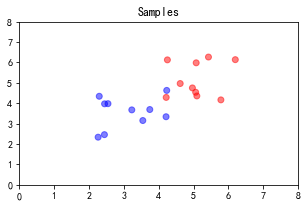

In [2]:
np.random.seed(8115333)

x1 = np.random.rand(10, 2) * 3 + 2 
y1 = [0] * len(x1)

x2 = np.random.rand(10, 2) * 3 + 4
y2 = [1] * len(x2)

x = np.concatenate([x1, x2], axis=0)
y = np.concatenate([y1, y2])

plt.figure(figsize=(5, 3))
plt.title("Samples")
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="bwr", alpha=0.5)
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

# 逻辑回归

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_inv(f):
    return f * (1-f)

# 固定初始化
np.random.seed(313131)
weight = np.random.randn(2, 1)
bias = np.random.randn()

# 超参数设置
lr = 0.9 # 学习率
loops = 150 # 迭代次数
datas = list() # 保存中间结果

# 训练和迭代
for loop in range(loops):
    
    # 输入样本，激活
    z = x @ weight + bias
    f = sigmoid(z).ravel()
    
    # 反向传播梯度
    mse = np.var(y - f)
    delta_w0 = np.mean((y-f)*(-1)*f*(1-f)*x[:, 0].ravel())
    delta_w1 = np.mean((y-f)*(-1)*f*(1-f)*x[:, 1].ravel())
    delta_b = np.mean((y-f)*(-1))
    
    # 更新权重
    weight[0][0] -= lr * delta_w0
    weight[1][0] -= lr * delta_w1
    bias -= lr * delta_b
    
    # 获取输出
    z = x @ weight + bias
    f = sigmoid(z).ravel()   
    label = np.where(np.array(f)>=0.5, 1, 0)
    accuracy = np.sum(y == label) / len(y)
    
    # 保存中间结果
    datas.append([loop, mse, weight[0][0], weight[1][0], bias, accuracy])

# 结果处理成 dataFrame 保存
dfr = pd.DataFrame(datas, columns=["loop", "mse", "weight0", "weight1", "bias", "accuracy"])

# 迭代的中间结果预览

In [4]:
dfr

,loop,mse,weight0,weight1,bias,accuracy
0,0,0.234532,1.334244,-0.314363,-0.048809,0.50
1,1,0.221969,1.269028,-0.402554,-0.464257,0.50
2,2,0.198214,1.157126,-0.547093,-0.836190,0.65
3,3,0.171966,1.024528,-0.695941,-1.081852,0.70
4,4,0.189573,1.068380,-0.635581,-1.096427,0.70
...,...,...,...,...,...,...
145,145,0.080568,1.023261,0.298499,-5.392820,0.95
146,146,0.080359,1.024212,0.301424,-5.409979,0.95
147,147,0.080151,1.025168,0.304324,-5.427051,0.95
148,148,0.079946,1.026130,0.307200,-5.444036,0.95


# Weight 和 bias 的迭代过程

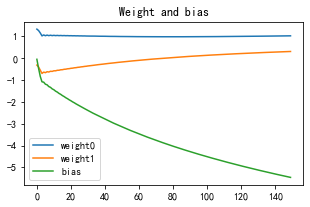

In [5]:
plt.figure(figsize=(5, 3))
plt.title("Weight and bias")
plt.plot(dfr["loop"], dfr["weight0"], label="weight0")
plt.plot(dfr["loop"], dfr["weight1"], label="weight1")
plt.plot(dfr["loop"], dfr["bias"], label="bias")
plt.legend()
plt.show()

# MSE 迭代图

可以看到，前20次迭代中，均方误差震荡中快速下降

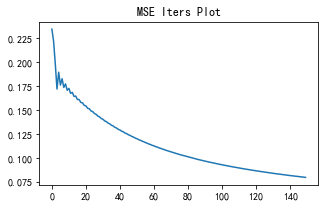

In [6]:
plt.figure(figsize=(5, 3))
plt.title("MSE Iters Plot")
plt.plot(dfr["loop"], dfr["mse"])
plt.show()

# Accuracy 迭代过程

预测正确率井条有序上升

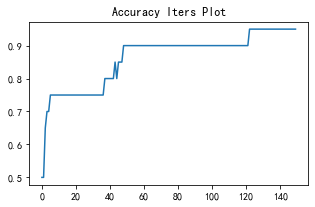

In [7]:
plt.figure(figsize=(5, 3))
plt.title("Accuracy Iters Plot")
plt.plot(dfr["loop"], dfr["accuracy"])
plt.show()

# 决策边界，轮廓图

只有1个异常点没办法区分出来，在神经网络中增加隐含层可以解决

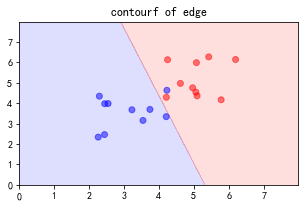

In [8]:
idx = np.arange(-0, 8, 0.01)
idy = np.arange(-0, 8, 0.01)

idxx, idyy = np.meshgrid(idx, idy)
idt = np.c_[idxx.ravel(), idyy.ravel()]
idz = sigmoid(idt @ weight + bias)
# idz = kmeans.predict(idt)

idz2 = idz.copy()
idz2[idz >= 0.5] = 1
idz2[idz < 0.5] = 0
# print(idz2)

idzz = idz2.reshape(idxx.shape)
# print(idzz)

plt.figure(figsize=(5, 3))
plt.title("contourf of edge")
plt.contourf(idxx, idyy, idzz, alpha=0.15, cmap="bwr")
plt.scatter(x[:, 0].ravel(), x[:, 1].ravel(), c=y, alpha=0.5, cmap="bwr")
plt.show()

# 决策边界迭代过程动画

In [9]:
idx = np.arange(-0, 8, 0.01)
idy = np.arange(-0, 8, 0.01)
idxx, idyy = np.meshgrid(idx, idy)
idt = np.c_[idxx.ravel(), idyy.ravel()]
    
countfs = list()
loops = len(dfr)
for i in range(loops):
    weight_ = dfr.loc[i, ["weight0", "weight1"]].values.reshape(-1, 1)
    bias_ = dfr.loc[i, ["bias"]].values
    idz = sigmoid(idt @ weight_ + bias_)
    idz2 = idz.copy()
    idz2[idz >= 0.5] = 1
    idz2[idz < 0.5] = 0
    idzz = idz2.reshape(idxx.shape)
    countfs.append(idzz)
    # print(f"i = {i} finished.")
# print(countfs)

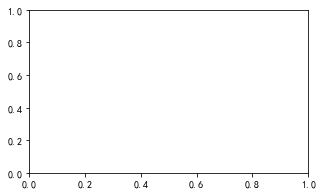

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation


fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(3)


def update(i):
    ax.clear()
    ax.contourf(idxx, idyy, countfs[i], alpha=0.15, cmap="bwr")
    ax.scatter(x[:, 0].ravel(), x[:, 1].ravel(), c=y, alpha=0.5, cmap="bwr")
    ax.set_title(f"i = {i}, mse = {dfr.loc[i, 'mse']:>2.4f}, accuracy = {dfr.loc[i, 'accuracy']:>2.4f}")
    return 


ani = animation.FuncAnimation( 
    fig=fig, # 图形对象
    func=update, # 更新函数
    frames=150,  # 传递给 func 的可迭代对象，nums = range(nums)
    interval=100, # 每帧之间的毫秒间隔
    blit=False,
)


plt.show()